In [2]:
# Z- test
# Sample size>30 and sigma of population given

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# implementation of z-test

In [41]:
from numpy.random import randn
population = randn(500)

In [42]:
population

array([-0.19664998,  0.26494941,  0.21122342, -1.18588479,  0.05805806,
       -0.21275273,  0.20701361, -0.74937519,  1.11667513, -0.39729765,
       -0.52443951, -1.01456649,  0.88393723,  0.17418781,  0.30979642,
       -0.43592595, -1.47556932,  1.26481785, -1.19625673,  1.90653215,
        0.06487111, -0.21021339, -1.1502901 , -1.164857  , -0.38850929,
       -0.93360157,  0.9906621 ,  1.8217249 , -0.04068998,  1.51267622,
        1.14100016, -0.74804385,  0.37567575, -0.99639999,  1.10591578,
       -0.01376304,  0.19624428,  1.73602813,  0.29906306, -0.54048386,
        1.67450226, -2.07560707,  0.06742247,  0.34558356, -0.11814513,
        0.19909989,  1.45059576,  0.79238431, -0.70271924, -0.95159354,
        0.27351487, -1.14853045, -1.93908403, -0.17312507, -0.30096831,
       -1.14991388,  0.81836574, -0.10431321, -0.45683541,  1.0030909 ,
        0.90587374,  0.63845102,  0.65108271,  1.0359385 , -0.75809421,
        2.66581903, -1.96536061, -0.60462003, -0.4787443 , -0.18

/tmp/ipykernel_70/1216790164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(population)


<AxesSubplot: ylabel='Density'>

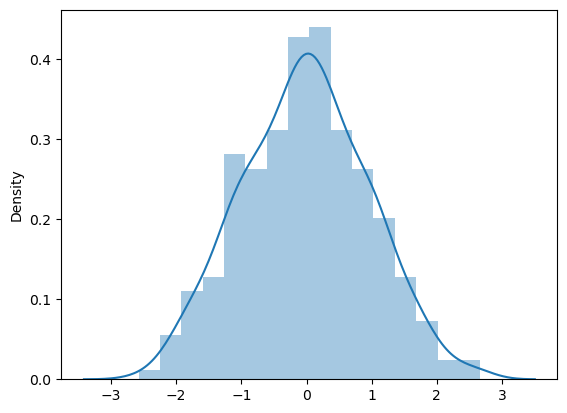

In [43]:
# plot population
sns.distplot(population)

In [44]:
np.mean(population), np.std(population)

(-0.01893788270312332, 0.9662544326961394)

In [49]:
# How to verify whether the distribution is normal
# 1. we can see it from displot, the histrogram looks like normally distributed.

In [50]:
# 2. Using Q-Q plot 

In [51]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [52]:
def plot_area(sample):
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    sns.distplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample, dist = 'norm', plot = pylab)

/tmp/ipykernel_70/3695075087.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


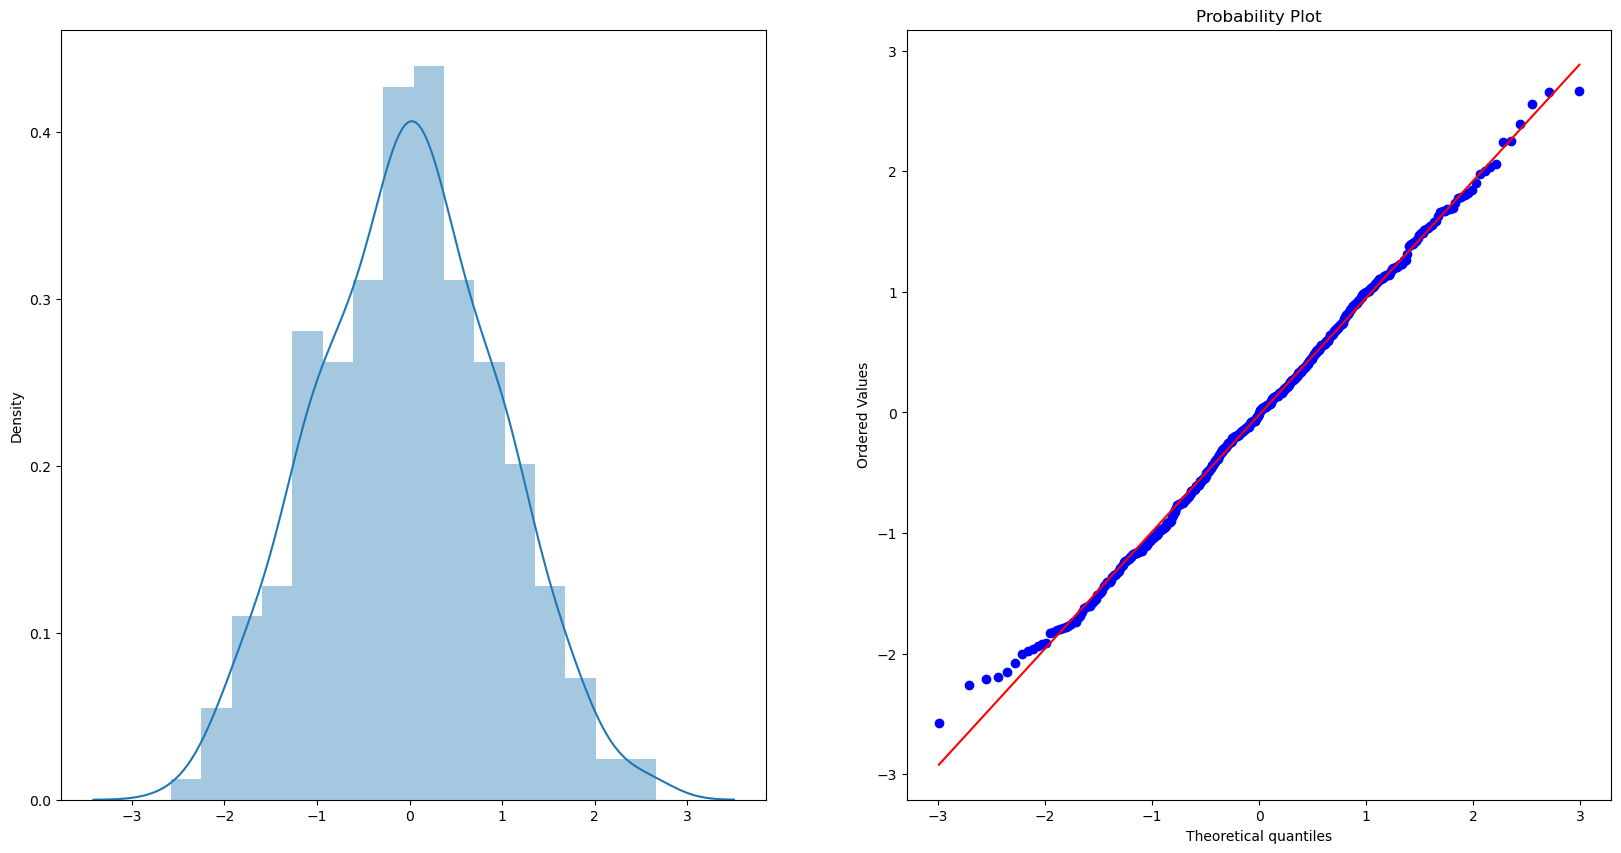

In [53]:
plot_area(population)

In [ ]:
# looking at probability plot, we can see most of the data points are aligned with the redline
# and the density plot also shows the normal distn.,
# Hence, it proves that the data is normally distributed

In [62]:
# 3. Using statistical Test - 
# 3.1 Z-Test
# 3.2 Shapiro- Wilk Test

In [55]:
# 3.1 = Z - Test

In [56]:
np.mean(population)

-0.01893788270312332

In [45]:
# assume null hypothesis = mean calaculated
null_mean = -0.018

In [46]:
from statsmodels.stats.weightstats import ztest

In [57]:
zscore, pvalue = ztest(population, value = null_mean, alternative = 'larger')

In [58]:
pvalue

0.5086493473439391

In [60]:
# since p value is greater that 0.05, the population data is normally distributed.
# Hence, we fail to reject null hypothesis ie. data is normally distributed

In [63]:
# 3.2 Shapiro- Wilk Test

In [65]:
# In this test, Ho = the data you are seeing is from a normal distribution
# this can be proved if pvalue > 0.05(level of significance)
# if pvalue <= 0.05, reject Ho
# if pvalue> 0.05, we fail to reject Ho

In [66]:
from scipy import stats


In [69]:
stats, pvalue1 = stats.shapiro(population)

In [70]:
pvalue1

0.45529794692993164

In [72]:
# since pvalue is greater than 0.05, we fail to reject the Ho
# which means the data is normally distributed

In [2]:
# T-test
# to be conducted when ss<30 and sigma of population is not given 

In [3]:
# one sample t-test
# with respect to one independent sample

In [42]:
# import all libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# generate population
population = np.random.randint(10, 100, 50)
population

array([24, 28, 39, 20, 45, 70, 88, 95, 62, 20, 57, 18, 21, 80, 96, 51, 86,
       88, 59, 36, 81, 77, 82, 66, 58, 34, 24, 50, 42, 82, 66, 11, 82, 88,
       24, 20, 26, 42, 90, 82, 14, 49, 17, 82, 29, 62, 35, 99, 19, 55])

In [15]:
# just to check what is mean of population
np.mean(population)

53.42

In [7]:
# generating sample
my_score = np.random.choice(population, 25)
my_score

array([66, 82, 20, 20, 80, 55, 18, 82, 99, 18, 24, 57, 66, 88, 20, 58, 24,
       62, 20, 77, 82, 66, 51, 82, 51])

In [8]:
np.mean(my_score)

54.72

In [9]:
import scipy

In [21]:
# null hypothesis is: mean of sample is equal to mean of population
# my_score = sample observation
# 54 = expected value of null hypothesis - should be equal to my_score or closer to that value
# alternative = hypothesis having value greater that sample observation
stats, pvalue = scipy.stats.ttest_1samp(my_score, 54, alternative = 'greater')

In [22]:
pvalue

0.4468663412727172

In [23]:
alpha = 0.05

In [24]:
if pvalue>= alpha:
    print("Accept Ho, mean of one independent sample is equal to the mean of population")
else:
    print("Reject Ho, mean of one independent sample is not equal to the mean of population")

Accept Ho, mean of one independent sample is equal to the mean of population


In [25]:
# two sample ttest

In [26]:
population1 = np.random.randint(10,100, 50)
population1

array([96, 26, 44, 90, 92, 81, 51, 74, 25, 96, 72, 34, 69, 58, 99, 31, 49,
       98, 28, 78, 62, 82, 48, 66, 95, 22, 87, 69, 31, 20, 58, 99, 77, 41,
       19, 85, 59, 41, 14, 48, 67, 94, 75, 53, 13, 36, 71, 11, 99, 40])

In [27]:
your_score = np.random.choice(population1, 25)
your_score

array([69, 41, 25, 49, 67, 78, 36, 71, 53, 71, 99, 11, 19, 14, 74, 62, 53,
       81, 98, 82, 48, 90, 99, 31, 11])

In [28]:
stats1, pvalue1 = scipy.stats.ttest_ind(my_score, your_score)

In [29]:
pvalue1

0.742643855507108

In [30]:
if pvalue>= alpha:
    print("Accept Ho, means of two independent samples from two different populations are equal")
else:
    print("Reject Ho, means of two independent samples from two different populations are not equal")

Accept Ho, means of two independent samples from two different populations are equal


In [31]:
# verify the same, let us calculate mean of other sample
np.mean(your_score)

57.28

In [32]:
np.mean(my_score)

54.72

In [33]:
# almost equal

In [34]:
# paired ttest

In [35]:
# chi_square test
# when you want to compare two categorical variables

In [56]:
# generate data set
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [57]:
import statistics
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [59]:
data_table = pd.crosstab(data['sex'], data['smoker'])
data_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [61]:
observed_values = data_table.values
observed_values

array([[60, 97],
       [33, 54]])

In [62]:
# in chi_square test, we need expected values and we get it from chi_square contingency dataset

In [67]:
stats_test, p,dof, Expected_values = scipy.stats.chi2_contingency(observed_values)

In [68]:
Expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [69]:
# to keep observed values and expected values together
for o,e in zip(observed_values, Expected_values):
    print(o,e)

[60 97] [59.84016393 97.15983607]
[33 54] [33.15983607 53.84016393]


In [70]:
# to complete chi_square_statistics, using its formula
from scipy.stats import chi2
chi_square_test = sum([(o-e)**2/e for o,e in zip(observed_values, Expected_values)]) 

In [71]:
chi_square_test

array([0.00119737, 0.00073745])

In [74]:
# to get chi_square_statistics value, we need to add all the elements of chi_sqaure_test
chi_square_statistics = chi_square_test[0] + chi_square_test[1]
chi_square_statistics

0.001934818536627623

In [75]:
# to calculate chi_square_critical

In [76]:
alpha = 0.05
# we need to calculate critical value and pvalue

In [77]:
# degree of freedom, we need no. of rows and no. of columns
no_of_rows = data_table.iloc[0:2, 0]
no_of_rows


sex
Male      60
Female    33
Name: Yes, dtype: int64

In [78]:
no_of_columns = data_table.iloc[0, 0:2]
no_of_columns

smoker
Yes    60
No     97
Name: Male, dtype: int64

In [80]:
dof = (len(no_of_rows)-1)*(len(no_of_columns)-1)
dof

1

In [81]:
# code to calculate chi_sqaure_critical
from scipy.stats import chi2 
chi_sqaure_critical = chi2.ppf(1-alpha, df = dof)
chi_sqaure_critical

3.841458820694124

In [85]:
# conclusion part
if chi_square_statistics<= chi_sqaure_critical:
    print("Accept Ho, there is no relationship between two categorical variables")
else:
    print("Reject Ho, there is no relationship between two categorical variables")

Accept Ho, there is no relationship between two categorical variables


In [83]:
# verification with the help pf pvalue


In [84]:
p_value = 1-chi2.cdf(x = chi_square_statistics, df = dof)
p_value

0.964915107315732

In [86]:
if p_value>= alpha:
    print("Accept Ho, there is no relationship between two categorical variables")
else:
    print("Reject Ho, there is no relationship between two categorical variables")

Accept Ho, there is no relationship between two categorical variables
